<a href="https://colab.research.google.com/github/andssuu/PBEA7347/blob/main/notebooks/b3_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/andssuu/PBEA7347.git



Cloning into 'PBEA7347'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 69 (delta 16), reused 46 (delta 8), pack-reused 0
Unpacking objects: 100% (69/69), done.


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [57]:
df = pd.read_csv('PBEA7347/data/b3_data_14012021.csv', float_precision='high', sep=";")
labels = df.iloc[:, 0]
divida = df.iloc[:, 12:]
retorno = df.iloc[:,11:12]
eficiencia = df.iloc[:, 7:9]
eficiencia["media eficiencia"] = eficiencia.sum(axis=1) / 2
eficienciaMedia = eficiencia.iloc[:, -1]
data = retorno
data = data.join(divida)
data = data.join(eficienciaMedia)
normalized_data = (data - data.min()) / (data.max() - data.min())

In [58]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(normalized_data)
data_clustered = kmeans.predict(normalized_data)

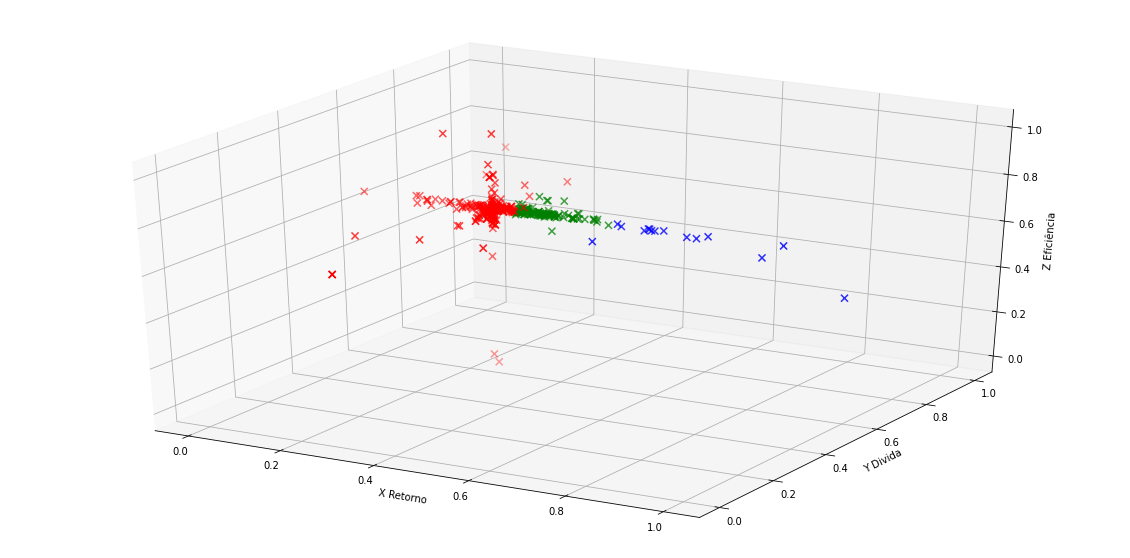

In [59]:
fig = plt.figure(figsize=(20, 10))
graph = fig.add_subplot(111, projection='3d')
label_color_map = {0 : 'red', 1 : 'blue', 2: 'green'}
label_color = [label_color_map[l] for l in data_clustered]
graph.scatter(normalized_data.iloc[:, 0], normalized_data.iloc[:, 1], normalized_data.iloc[:, 2], c=label_color, marker='x', s=50)
graph.set_xlabel('X Retorno')
graph.set_ylabel('Y Divida')
graph.set_zlabel('Z Eficiência')
#ax = fig.gca(projection='3d')
# for x, y, z, label in zip(normalized_data.iloc[:, 0], normalized_data.iloc[:, 1], normalized_data.iloc[:, 2], labels):
    # if x >= 0.7:
    #     ax.text(x, y, z, label, None) 
plt.show()

In [ ]:
normalized_data_2d = normalized_data.iloc[:,:2]

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(normalized_data_2d)
data_clustered = kmeans.predict(normalized_data_2d)

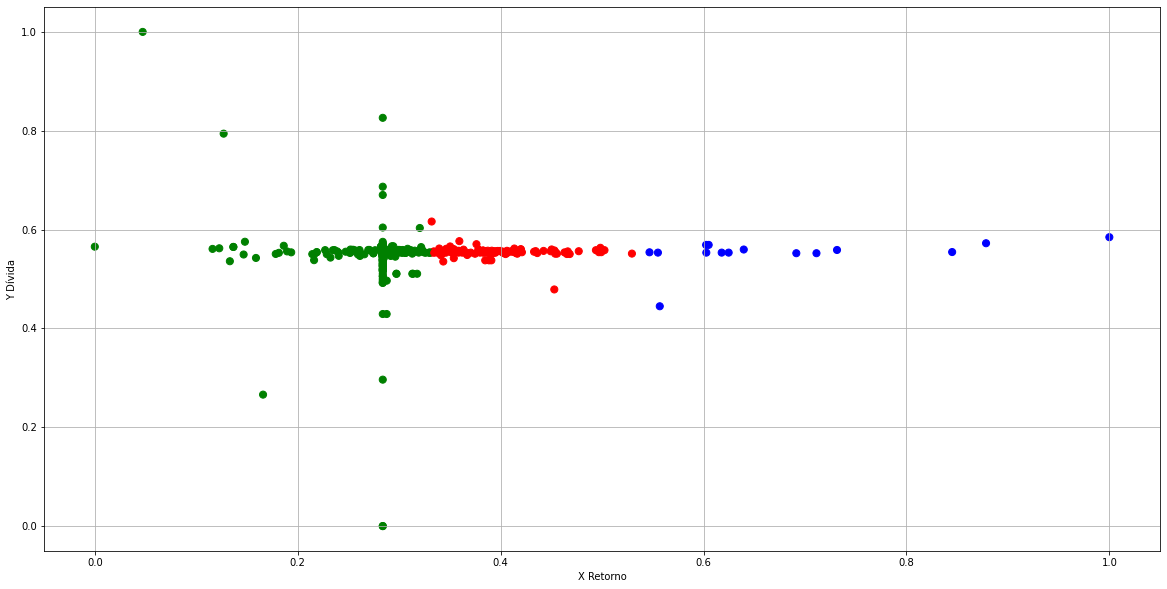

In [62]:
fig = plt.figure(figsize=(20, 10))
graph = fig.add_subplot(111)
graph.scatter(normalized_data_2d.iloc[:, 0], normalized_data_2d.iloc[:, 1], c=label_color, marker='o', s=50)
graph.set_xlabel('X Retorno')
graph.set_ylabel('Y Dívida')
# for x, y, label in zip(normalized_data.iloc[:, 0], normalized_data.iloc[:, 1], labels):
#     if x >= 0.3 and y <=0.55:
#         graph.text(x, y, label, )  
plt.grid()
plt.show()